# PE18_21_Whilden

CRUISE DATES    : 2018/03/25 04:20:48 to 2018/03/25 04:22:59

Run this from `~/adcp_processing/processed_data/pe1821`. All paths are relative to here.

Note that images have been stored in a github issue so that they can be referenced inline here without actually being stored in the repository. Interactive lines have been commented out so that all cells can be run without interference.

In [1]:
import os
# %matplotlib inline
from IPython.display import display, Image
from glob import glob
import matplotlib.pyplot as plt


# define aliases for use within notebook
%alias dv python /Users/kthyng/opt/miniconda3/envs/pycodas/bin/dataviewer.py
%alias fv python /Users/kthyng/opt/miniconda3/envs/pycodas/bin/figview.py

In [2]:
# these are specific to this notebook
cruiseid = 'pe1821'
device = 'wh1200'

## Looked at existing processing that occurred on the ship

Define path to cruise data processing directory, and give that to `dataviewer` (via the alias) to look at the data. This will pop up in another window.

In [3]:
# for accessing original data
procpathorig = '"/Volumes/GoogleDrive/Shared drives/NSF Rapid Response: Thyng & Socolofsky/HRRO3 March 25-27 2018/ADCP: Pelican/proc/"' + device
# procpathorig = os.path.join('/Users', 'kthyng', 'Documents', 'data_processed', 'adcp', cruiseid, cruiseid, 'proc', device)
# procpathorig = os.path.join('..', '..', '..', '..', 'data_processed', 'adcp', cruiseid, cruiseid, 'proc', device)

# for accessing post-processing of data
procpath = '/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/' + device
# procpath = os.path.join('/'.join(procpathorig.split('/')[:-2]) + '_postproc', device)

# root of post-processing directory
procpathroot = '/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/'
# procpathroot = '/'.join(procpathorig.split('/')[:-2]) + '_postproc'

In [4]:
# dv $procpathorig # this is how to examine the image files

## Get instructions to follow and get organized

We make a copy of the data in a `postproc` directory. The `quick_adcp` command brings up a bunch of helpful instructions, which we move to be alongside the data directory copy.

The numbers including in headings refer to the numbers in the log file.

In [5]:
# Copy original data to new parallel location so that we can work on it.
# Preserve instrument directory in case we have more than one.
# have already done this so commenting
!mkdir $procpathroot
!cp -r $procpathorig $procpath

In [6]:
# This is to catch the output from the following cell command
logfile = os.path.join(procpathroot, device + '.txt')  # make logfile in new processing directory

In [7]:
# get helpful instructions, capture them into "filename", and move "filename" into the data_postproc directory
!quick_adcp.py --commands postproc > $logfile

In [8]:
# prepend the log file with the cruise info
temppath = os.path.join(procpath, 'cruise_info.txt') # path to cruise_info file
!cat $temppath $logfile  > tempfile.txt  # prepend cruise_info then logfile into new file
!mv tempfile.txt $logfile                # move new file into old logfile

In [9]:
# also save copy of cruise_info.txt here for reference
!cat $temppath 

LAST CHANGED    : 2018/03/29 02:01:53
CRUISE NAME(S)  : PE18_21_Whilden_ADCP
CRUISE DATES    : 2018/03/25 04:20:48 to 2018/03/25 04:22:59
SHIP NAME       : unspecified
PORTS           : unspecified
CHIEF SCIENTIST : unspecified
DATABASE NAME   : a_pe
DATA FILES      : pe2018_083_15660.raw to pe2018_087_07200.raw

STATUS          :  to do                           done
                  ------                       -----------
                  averaged                       [     ]
                  loaded                         [     ]

                  NOTE: heading correction instrument exists
                        NOTE: time-dependent heading corrections
                        applied IN the ensembles
                        (see   cal/rotate/ens_hcorr.ang)

                  check heading correction       [     ]
                  calibration                    [     ]
                  edited                         [     ]
                  re-check heading correction    [ 

In [10]:
str1 = 's/km1001c/' + cruiseid + '/g'
str2 = 's/os38nb/' + device + '/g'

In [11]:
# This might only work on Mac/Linux
# change default cruise name in file to this cruise name
!sed -i "" -e $str1 $logfile
# change default instrument name in file to this instrument
!sed -i "" -e $str2 $logfile

In [12]:
# The instructions are located in:
print(logfile)

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.txt


In [13]:
# look at the cruise track to see what we're expecting
# can do the following in a terminal window:
# plot_nav.py $procpath

Here is what the cruise track looks like:

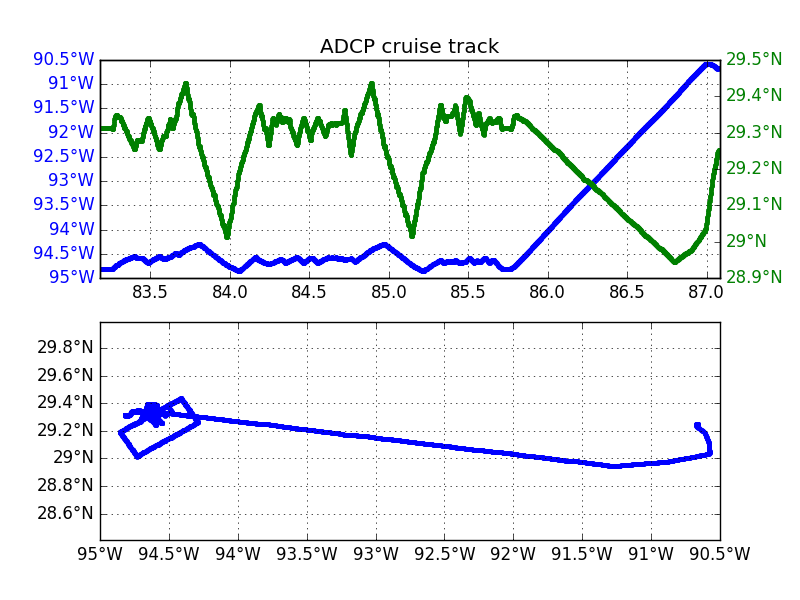

In [14]:
display(Image(os.path.join(procpath, 'nav', 'nav_plot.png'), width=600))

## Check heading

Look at figures in `~/cal/rotate/ens_hcorr_*.png` for gaps or red markers indicating problems.

This can be done with the following in the terminal window or here to browse the images, but they are also included below.

The images indicate that things are looking good!

In [15]:
path = os.path.join(procpath, 'cal', 'rotate', 'ens_hcorr_*.png')

In [16]:
# fv $path

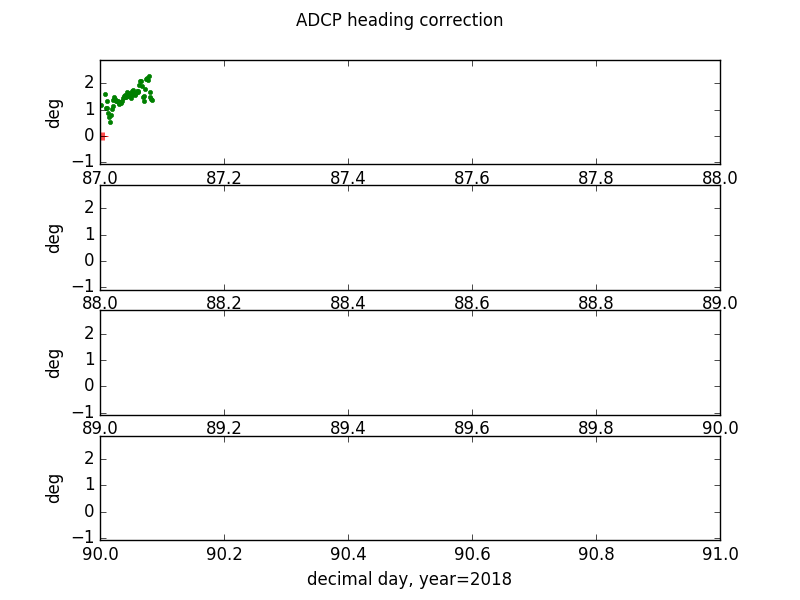

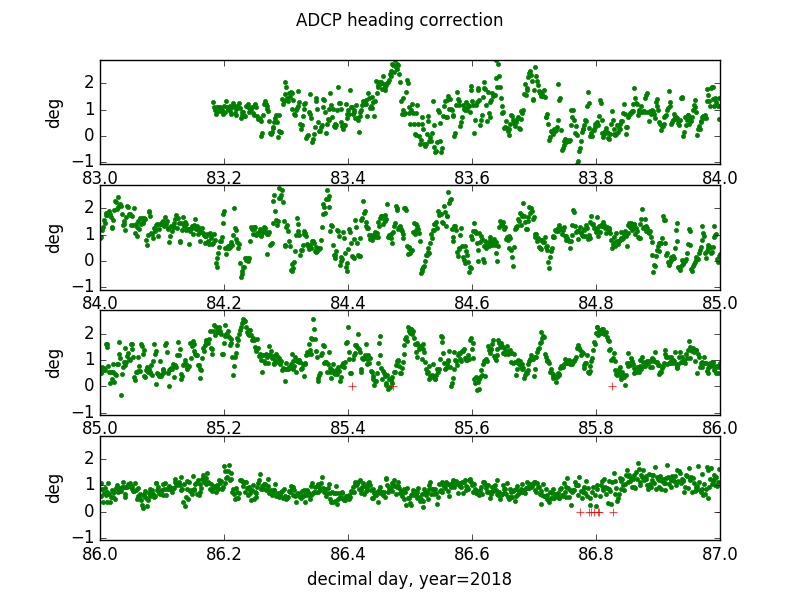

In [17]:
names = glob(path)
[display(Image(name, width=600)) for name in names];

There are a few red crosses that we can address with interpolation, and there is a script and [example](https://currents.soest.hawaii.edu/docs/adcp_doc/codas_doc/patch_hcorr/index.html) for that.

We start by making a copy of the data for this step.

In [18]:
# copy new data directory
procpath_heading = os.path.join(procpathroot, device + '.heading_correction')
!cp -r $procpath $procpath_heading

### Correct heading

When running `patch_hcorr.py`, I had to set the standard deviation cutoff to 3. This seems incorrect according to the example, but the data looked ok.

We now have multiple data directories, so we should move to the correct one.

In [19]:
%cd $procpath_heading
!patch_hcorr.py
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction
qt.qpa.fonts: Populating font family aliases took 629 ms. Replace uses of missing font family "?" with one that exists to avoid this cost. 
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
===Please Wait While the Process is Running===


===Please Wait While the Process is Running===

INFO: database ../../adcpdb/a_pe opened

--------
 Pass 1: Checking control file...
--------
INFO: DBSRCH search beyond end
INFO: DBMOVE search beyond end
% OPTIONS:
% =======
% water_and_bottom_track:% OPTIONS:
% =======
% year_base= 2018
% unrotate!
% amplitude= 1.000000
% angle_0= 0.000000
% =======

% ===

### Check heading

Check to make sure the red crosses showing gaps are gone and replacements look reasonable:

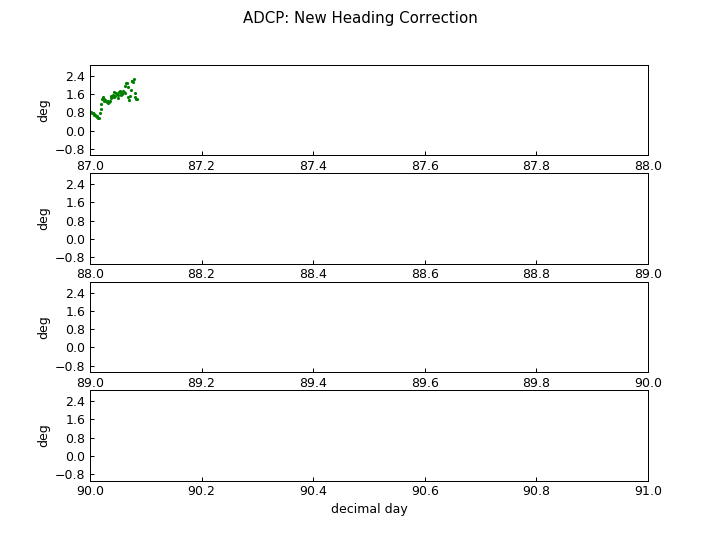

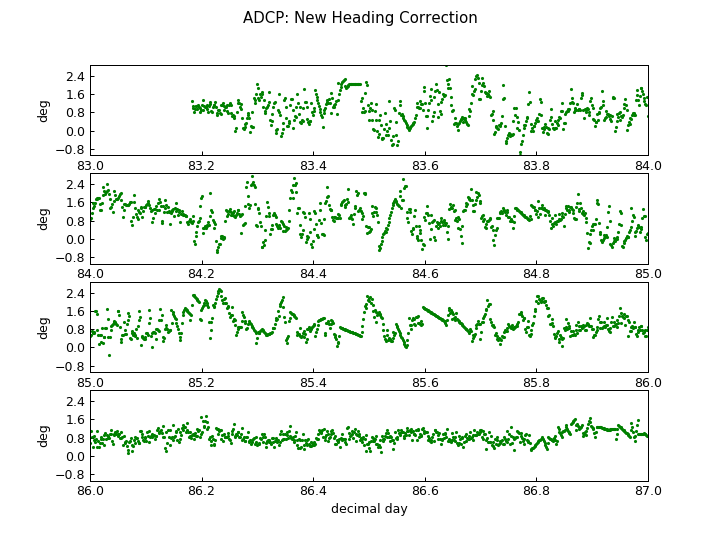

In [20]:
path = os.path.join(procpath_heading, 'cal', 'rotate', 'newhcorr_*.png')
names = glob(path)
[display(Image(name, width=600)) for name in names];

## Remove data from outside study

We have data from before and after the field work, when the ship was traveling to and from the study site. We should remove this.

Using the following GUI, I removed all the velocity signal from before reaching Galveston Channel and after the ship stopped back at port at the end.

First, make a new copy of the data.

In [21]:
procpath_heading_subset = os.path.join(procpathroot, device + '.heading_correction_subset')
!cp -r $procpath_heading $procpath_heading_subset

The easiest way to tell when the ship is not doing the actual field work is by the smaller map and the manual editing selector.

In [22]:
%cd $procpath_heading_subset
!dataviewer.py -e
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset
qt.qpa.fonts: Populating font family aliases took 584 ms. Replace uses of missing font family "?" with one that exists to avoid this cost. 
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
qt.qpa.window: Window position QRect(0,-495 643x445) outside any known screen, using primary screen
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
WARNING - zgrid: No data
    Returning all values masked.
WARNING - zgrid: No data
    Returning all values masked.
/Users/kthyng/projects/adcp_processing/processed_data/pe1821


You can check the data to make sure the edits stuck.

In [24]:
%cd $procpath_heading_subset
!dataviewer.py
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset
qt.qpa.fonts: Populating font family aliases took 562 ms. Replace uses of missing font family "?" with one that exists to avoid this cost. 
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
Attribute Qt::AA_EnableHighDpiScaling must be set before QCoreApplication is created.
qt.qpa.window: Window position QRect(0,-495 643x445) outside any known screen, using primary screen
/Users/kthyng/projects/adcp_processing/processed_data/pe1821


### Rerun calibration

In [25]:
%cd $procpath_heading_subset
!quick_adcp.py --steps2rerun navsteps:calib --auto
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset
found dbinfo.txt: use values if otherwise unspecified
fix file is a_pe.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun navsteps:calib --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset
about to run these steps:
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2018/03/25  04:22:48 to 2018/03/29  02:01:12
(83.182500 to 87.084167)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

---------------------------------------------
step 2: run all navsteps 


--------

## Check calibration

The water track calculation is best to check for amplitude issues. The bottom track calculation is better to check for phase (if you have it).

### Amplitude

First copy data to new directory to work on

In [26]:
procpath_heading_subset_amp = os.path.join(procpathroot, device + '.heading_correction_subset_amp')
!cp -r $procpath_heading $procpath_heading_subset_amp

#### Check water track for amplitude

The next cell printout and the following images show that the amplitude is a bit low (below the gray line at 1) and needs a small correction. The amplitude should be very close to 1.00 (within 0.3%).

Now check

In [27]:
path = os.path.join(procpath_heading_subset_amp, 'cal', 'watertrk', 'adcpcal.out')
!tail -20  $path

 ADCP watertrack calibration
##
 Time range  83.27 to  87.07
   Calculation done at Thu Dec 17 19:36:37 2020
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
Number of edited points: 112 out of 161
   amp   = 0.9515  + -0.0013 (t -  84.4)
   phase =   0.15  + 0.2248 (t -  84.4)
            median     mean      std
amplitude   0.9520   0.9515   0.0121
phase       0.2240   0.1529   0.8146
nav - pc    0.0000  -0.7500   1.5509
var         0.0130   0.0146   0.0088
min var     0.0130   0.0148   0.0092
delta-u    -0.3200  -0.0781   3.0828
delta-v     0.4300   0.1932   3.0603



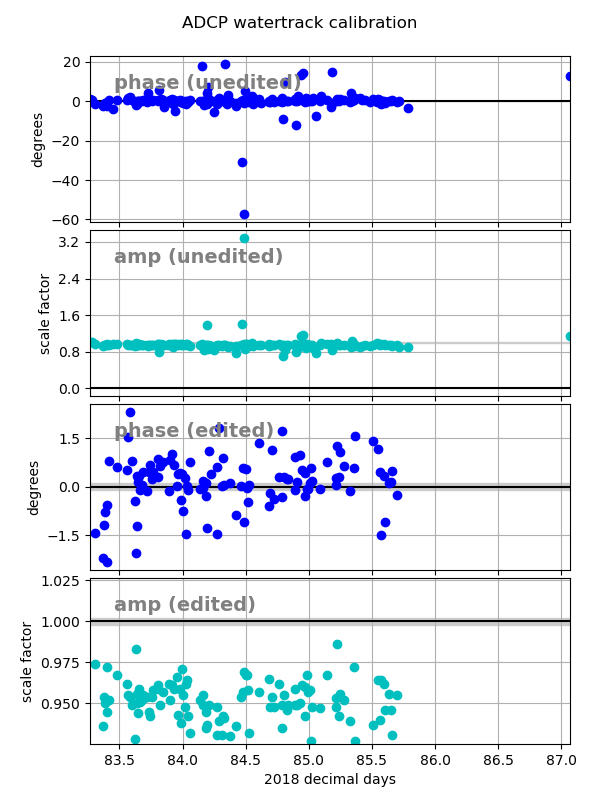

In [28]:
name = os.path.join(procpath_heading_subset_amp, 'cal', 'watertrk', 'wtcal1.png')
display(Image(name, width=600));

#### Apply amplitude correction

Apply small correction that is a combination of the amplitude median (0.9520) and mean (0.9515). We will use 0.952.

In [29]:
%cd $procpath_heading_subset_amp
!quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_amplitude 0.952 --auto
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp
found dbinfo.txt: use values if otherwise unspecified
fix file is a_pe.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: rotate:apply_edit:navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_amplitude 0.952 --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp
about to run these steps:
 - rotate
 - apply_edit
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2018/03/25  04:22:48 to 2018/03/29  02:01:12
(83.182500 to 87.084167)
---------------------------------------------
step 1: set up files for codas editing (gaut

#### Check calibration now

The following show that the amplitude looks good!

In [30]:
path = os.path.join(procpath_heading_subset_amp, 'cal', 'watertrk', 'adcpcal.out')
!tail -20  $path

 ADCP watertrack calibration
##
 Time range  83.27 to  87.07
   Calculation done at Thu Dec 17 19:39:43 2020
   delta-u min = -100.00, max = 100.00
   delta-v min = -100.00, max = 100.00
   clip_amp = 0.04,  clip_ph =  3.0
   clip_dt =   60,  clip_var = 0.050
Number of edited points: 108 out of 152
   amp   = 0.9986  + -0.0022 (t -  84.4)
   phase =   0.16  + 0.2110 (t -  84.4)
            median     mean      std
amplitude   0.9995   0.9986   0.0131
phase       0.2230   0.1588   0.7679
nav - pc    0.0000  -0.7870   2.4725
var         0.0030   0.0039   0.0035
min var     0.0020   0.0032   0.0031
delta-u     0.0150   0.0043   3.1390
delta-v     0.4700   0.2364   3.2413



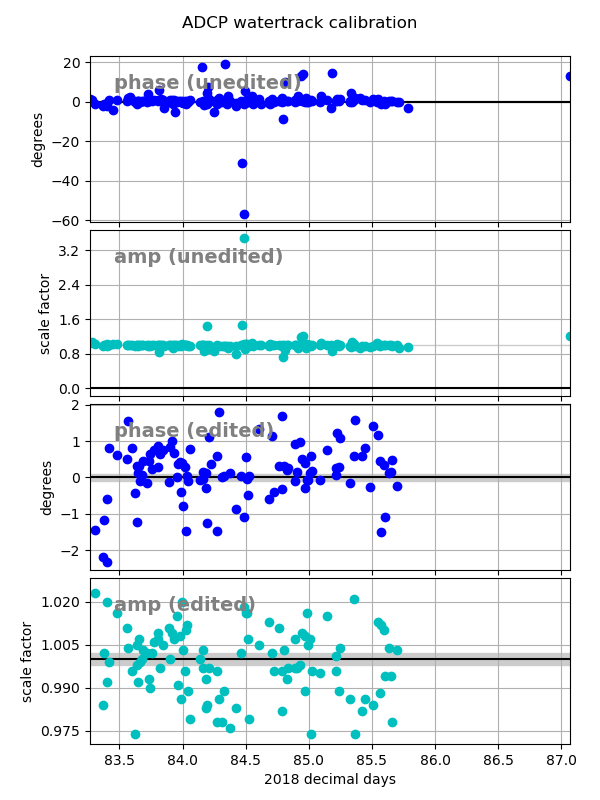

In [31]:
name = os.path.join(procpath_heading_subset_amp, 'cal', 'watertrk', 'wtcal1.png')
display(Image(name, width=600));

### Phase

First make a new copy of the data to work on

In [32]:
procpath_heading_subset_amp_phase = os.path.join(procpathroot, device + '.heading_correction_subset_amp_phase')
!cp -r $procpath_heading $procpath_heading_subset_amp_phase

#### Check bottom track for phase

Here we care specifically about the phase. The phase is a bit shifted relative to 0, so we will want to do a small correction. The phase should be very close to zero (within 0.05deg).

In [33]:
path = os.path.join(procpath_heading_subset_amp_phase, 'cal', 'botmtrk', 'btcaluv.out')
!tail -20  $path

unedited: 1731 points
edited:   1384 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9947   0.9944   0.0038
phase       0.2931   0.2974   0.2466

ADCP bottomtrack calibration

Time range  84.66 to  87.08
   Calculation done at Thu Dec 17 19:36:37 2020
    step: 1
    min_depth:   2   max_depth:  50
    min_speed:  2.0 m/s   max_sig:  2.5 std devs
    max_gap:  0.10 minutes   tol_dt: 0.02 (fraction)
unedited: 1732 points
edited:   1386 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9747   0.9742   0.0039
phase       0.3049   0.3109   0.2549



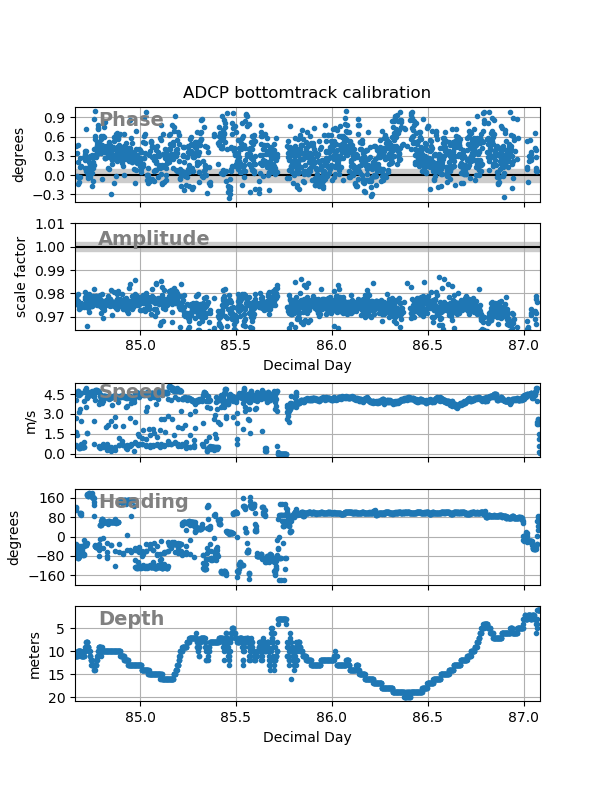

In [34]:
name = os.path.join(procpath_heading_subset_amp_phase, 'cal', 'botmtrk', 'btcal.png')
display(Image(name, width=600));

#### Apply phase correction

Apply small correction to phase between the median (0.3049) and mean (0.3109). We will use 0.3080.

In [35]:
%cd $procpath_heading_subset_amp_phase
!quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_angle  0.3080  --auto
%cd -

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp_phase
found dbinfo.txt: use values if otherwise unspecified
fix file is a_pe.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: rotate:apply_edit:navsteps:calib
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun rotate:apply_edit:navsteps:calib --rotate_angle 0.3080 --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp_phase
about to run these steps:
 - rotate
 - apply_edit
 - navsteps
 - calib
 - adcpsect
 - refabs
 - smoothnav
 - putnav
 - refplots
 - codaseditsetup
database time range:
2018/03/25  04:22:48 to 2018/03/29  02:01:12
(83.182500 to 87.084167)
---------------------------------------------
step 1: set up files for codas edit

#### Check calibration now

The following show that the phase looks good!

In [36]:
path = os.path.join(procpath_heading_subset_amp_phase, 'cal', 'botmtrk', 'btcaluv.out')
!tail -20  $path

unedited: 1732 points
edited:   1386 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9747   0.9742   0.0039
phase       0.3049   0.3109   0.2549

ADCP bottomtrack calibration

Time range  84.66 to  87.08
   Calculation done at Thu Dec 17 19:40:17 2020
    step: 1
    min_depth:   2   max_depth:  50
    min_speed:  2.0 m/s   max_sig:  2.5 std devs
    max_gap:  0.10 minutes   tol_dt: 0.02 (fraction)
unedited: 1732 points
edited:   1383 points, 2.0 min speed, 2.5 max dev
            median     mean      std
amplitude   0.9747   0.9743   0.0039
phase      -0.0077  -0.0001   0.2539



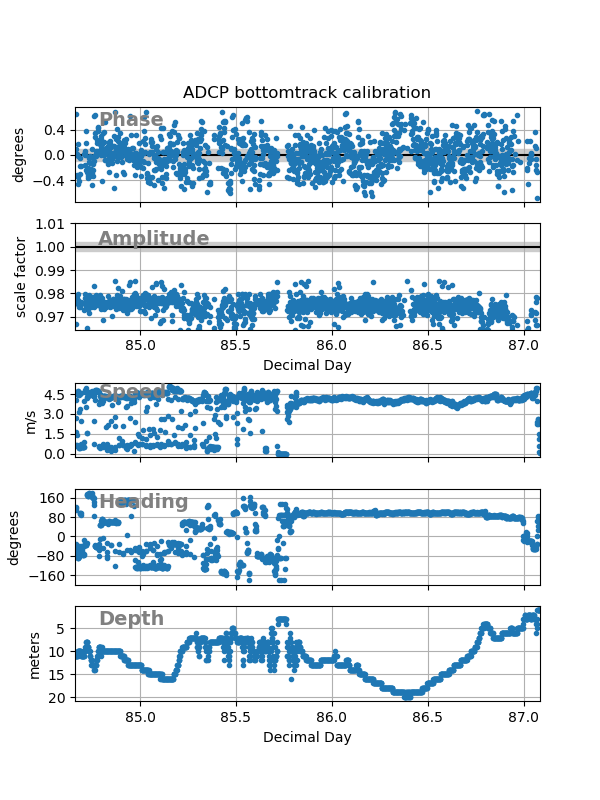

In [37]:
name = os.path.join(procpath_heading_subset_amp_phase, 'cal', 'botmtrk', 'btcal.png')
display(Image(name, width=600));

## Summary

I fixed a few heading gaps with the automatic script. I removed the start and end of the cruise. Final calibration used: amplitude correction 0.952, phase correction 0.3080. 

## Extract data

End up with netCDF (wh1200.nc) and .mat (allbin_*.mat) files located in `~/contour/`.

In [38]:
procpath_heading_subset_amp_phase + '/contour'

'/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp_phase/contour'

In [39]:
%cd $procpath_heading_subset_amp_phase
outpath = os.path.join('contour', device)
!adcp_nc.py adcpdb $outpath $cruiseid $device
!quick_adcp.py --steps2rerun matfiles --auto

/Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp_phase
found dbinfo.txt: use values if otherwise unspecified
fix file is a_pe.gps
reflayer: ref_method = refsm
reflayer: refuv_source = nav
reflayer: refuv_smoothwin = 3
found steps2rerun: matfiles
===========  new run: steps2rerun====================
command line was: /Users/kthyng/opt/miniconda3/envs/pycodas/bin/quick_adcp.py --steps2rerun matfiles --auto
cwd is /Users/kthyng/projects/adcp_processing/processed_data/pe1821/ADCP_Pelican_postproc/wh1200.heading_correction_subset_amp_phase
about to run these steps:
 - matfiles
 - codaseditsetup
database time range:
2018/03/25  04:22:48 to 2018/03/29  02:01:12
(83.182500 to 87.084167)
---------------------------------------------
step 1: set up files for codas editing (gautoedit.py)

---------------------------------------------
step 2: extract matlab "allbins" 



In [40]:
# look at netCDF file contents
outpath = outpath + '.nc'
!ncdump -h $outpath
%cd -

netcdf wh1200 {
dimensions:
	time = 2810 ;
	depth_cell = 40 ;
variables:
	int trajectory ;
		trajectory:standard_name = "trajectory_id" ;
	double time(time) ;
		time:long_name = "Decimal day" ;
		time:units = "days since 2018-01-01 00:00:00" ;
		time:C_format = "%12.5f" ;
		time:standard_name = "time" ;
		time:data_min = 83.1825 ;
		time:data_max = 87.0841666666667 ;
	double lon(time) ;
		lon:missing_value = 1.e+38 ;
		lon:long_name = "Longitude" ;
		lon:units = "degrees_east" ;
		lon:C_format = "%9.4f" ;
		lon:standard_name = "longitude" ;
		lon:data_min = -94.856325 ;
		lon:data_max = -90.5730305555555 ;
	double lat(time) ;
		lat:missing_value = 1.e+38 ;
		lat:long_name = "Latitude" ;
		lat:units = "degrees_north" ;
		lat:C_format = "%9.4f" ;
		lat:standard_name = "latitude" ;
		lat:data_min = 28.9437277777778 ;
		lat:data_max = 29.4368305555556 ;
	float depth(time, depth_cell) ;
		depth:missing_value = 1.e+38f ;
		depth:long_name = "Depth" ;
		depth:units = "meter" ;
		depth:C_forma

## Compare before and after post-processing

So, here is the difference between the cleaned up and the original data. The following is how to run this interactively. 

In [41]:
# dv --startday=83.38 -s 2.5 -m5 -n7 -c $procpath_heading_subset_amp_phase $procpath

Here is a snapshot of the results. 

Starting from the top subplot:
* u velocity, original
* u velocity, final
* difference: u (orig) - u (final)
* v velocity, original
* v velocity, final
* difference: v (orig) - v (final)

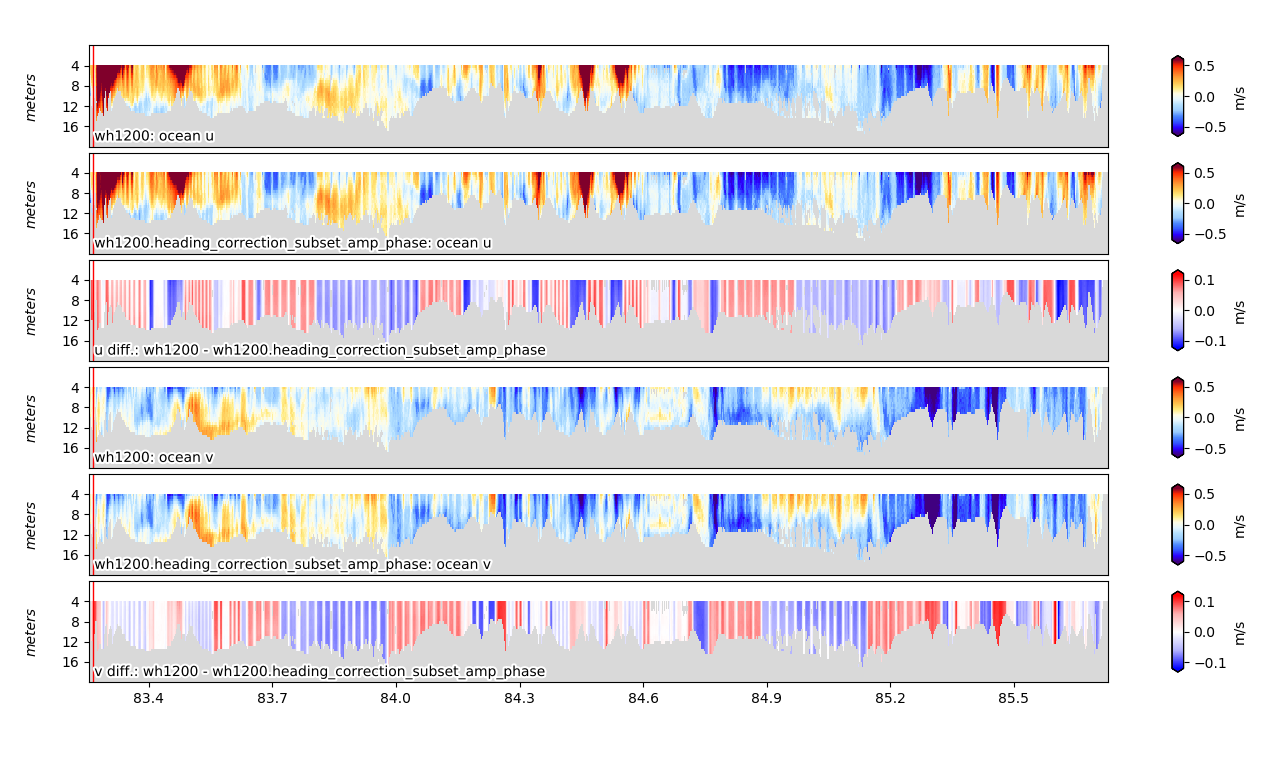

In [42]:
display(Image('https://user-images.githubusercontent.com/3487237/102533613-451ae180-406b-11eb-8938-1532dc646d6f.png'))

Overview of cruise.

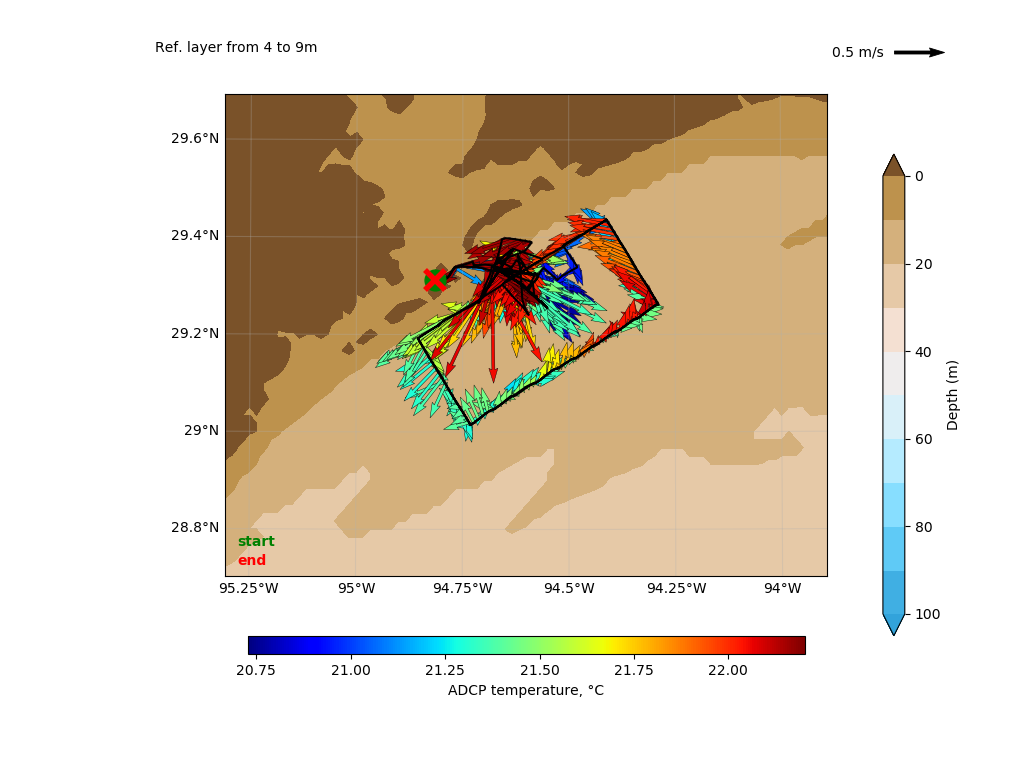

In [43]:
display(Image('https://user-images.githubusercontent.com/3487237/102533609-43e9b480-406b-11eb-8c32-012893c4fc4d.png'))